# **Scientific Computing From Scratch**

# **Pandas and scikit-learn -- data science and machine learning**

Lecturer: Wenhao Gao

Date: 2023/07/13

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## **Intro**

We have covered:
- Lesson 1: Python -- basic syntax, function, class, packages 
- Lesson 2: Numpy -- numerical operation in python
- Lesson 3: Matplotlib -- visualization

We will cover:
- Lesson 4 (today): Pandas and scikit-learn -- data science and machine learning
- Lesson 5+: PyTorch: deep learning

Why machine learning in scientific computing?

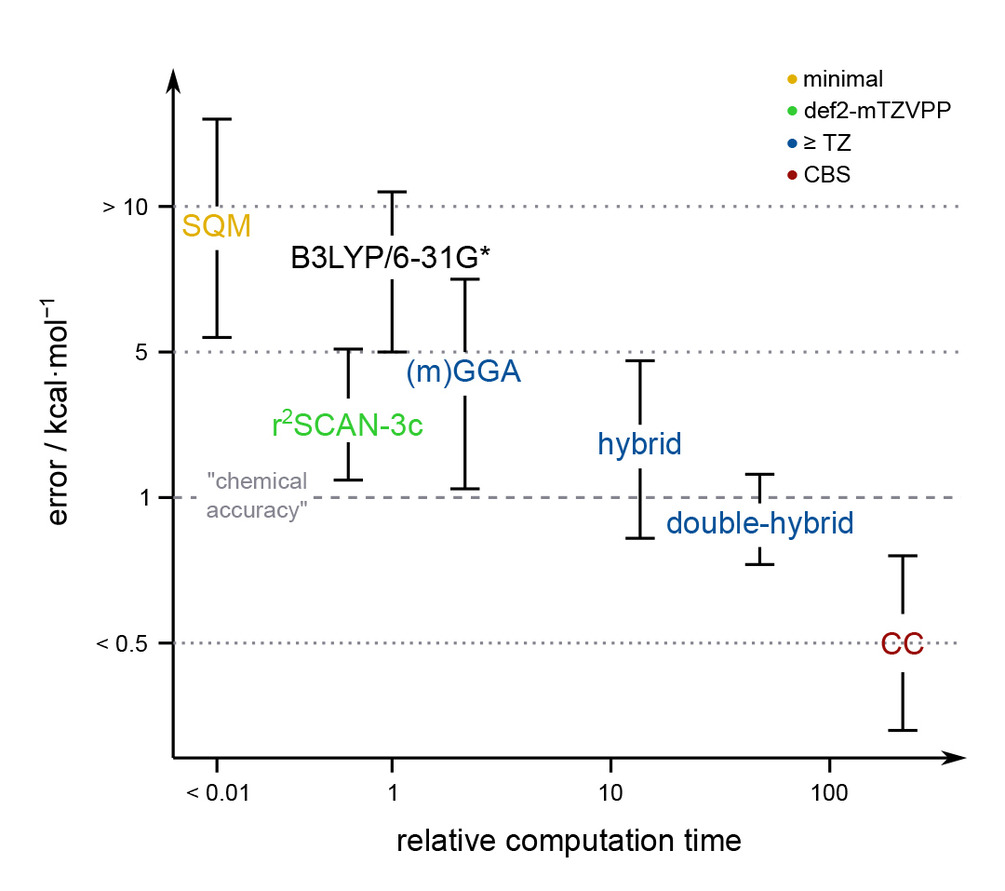

In [2]:
# Image from Bursch, M., Mewes, J. M., Hansen, A., & Grimme, S. (2022). Best‐Practice DFT Protocols for Basic Molecular Computational Chemistry. Angewandte Chemie International Edition, 61(42), e202205735.
Image(filename='./trade-off.jpg', width=750) 

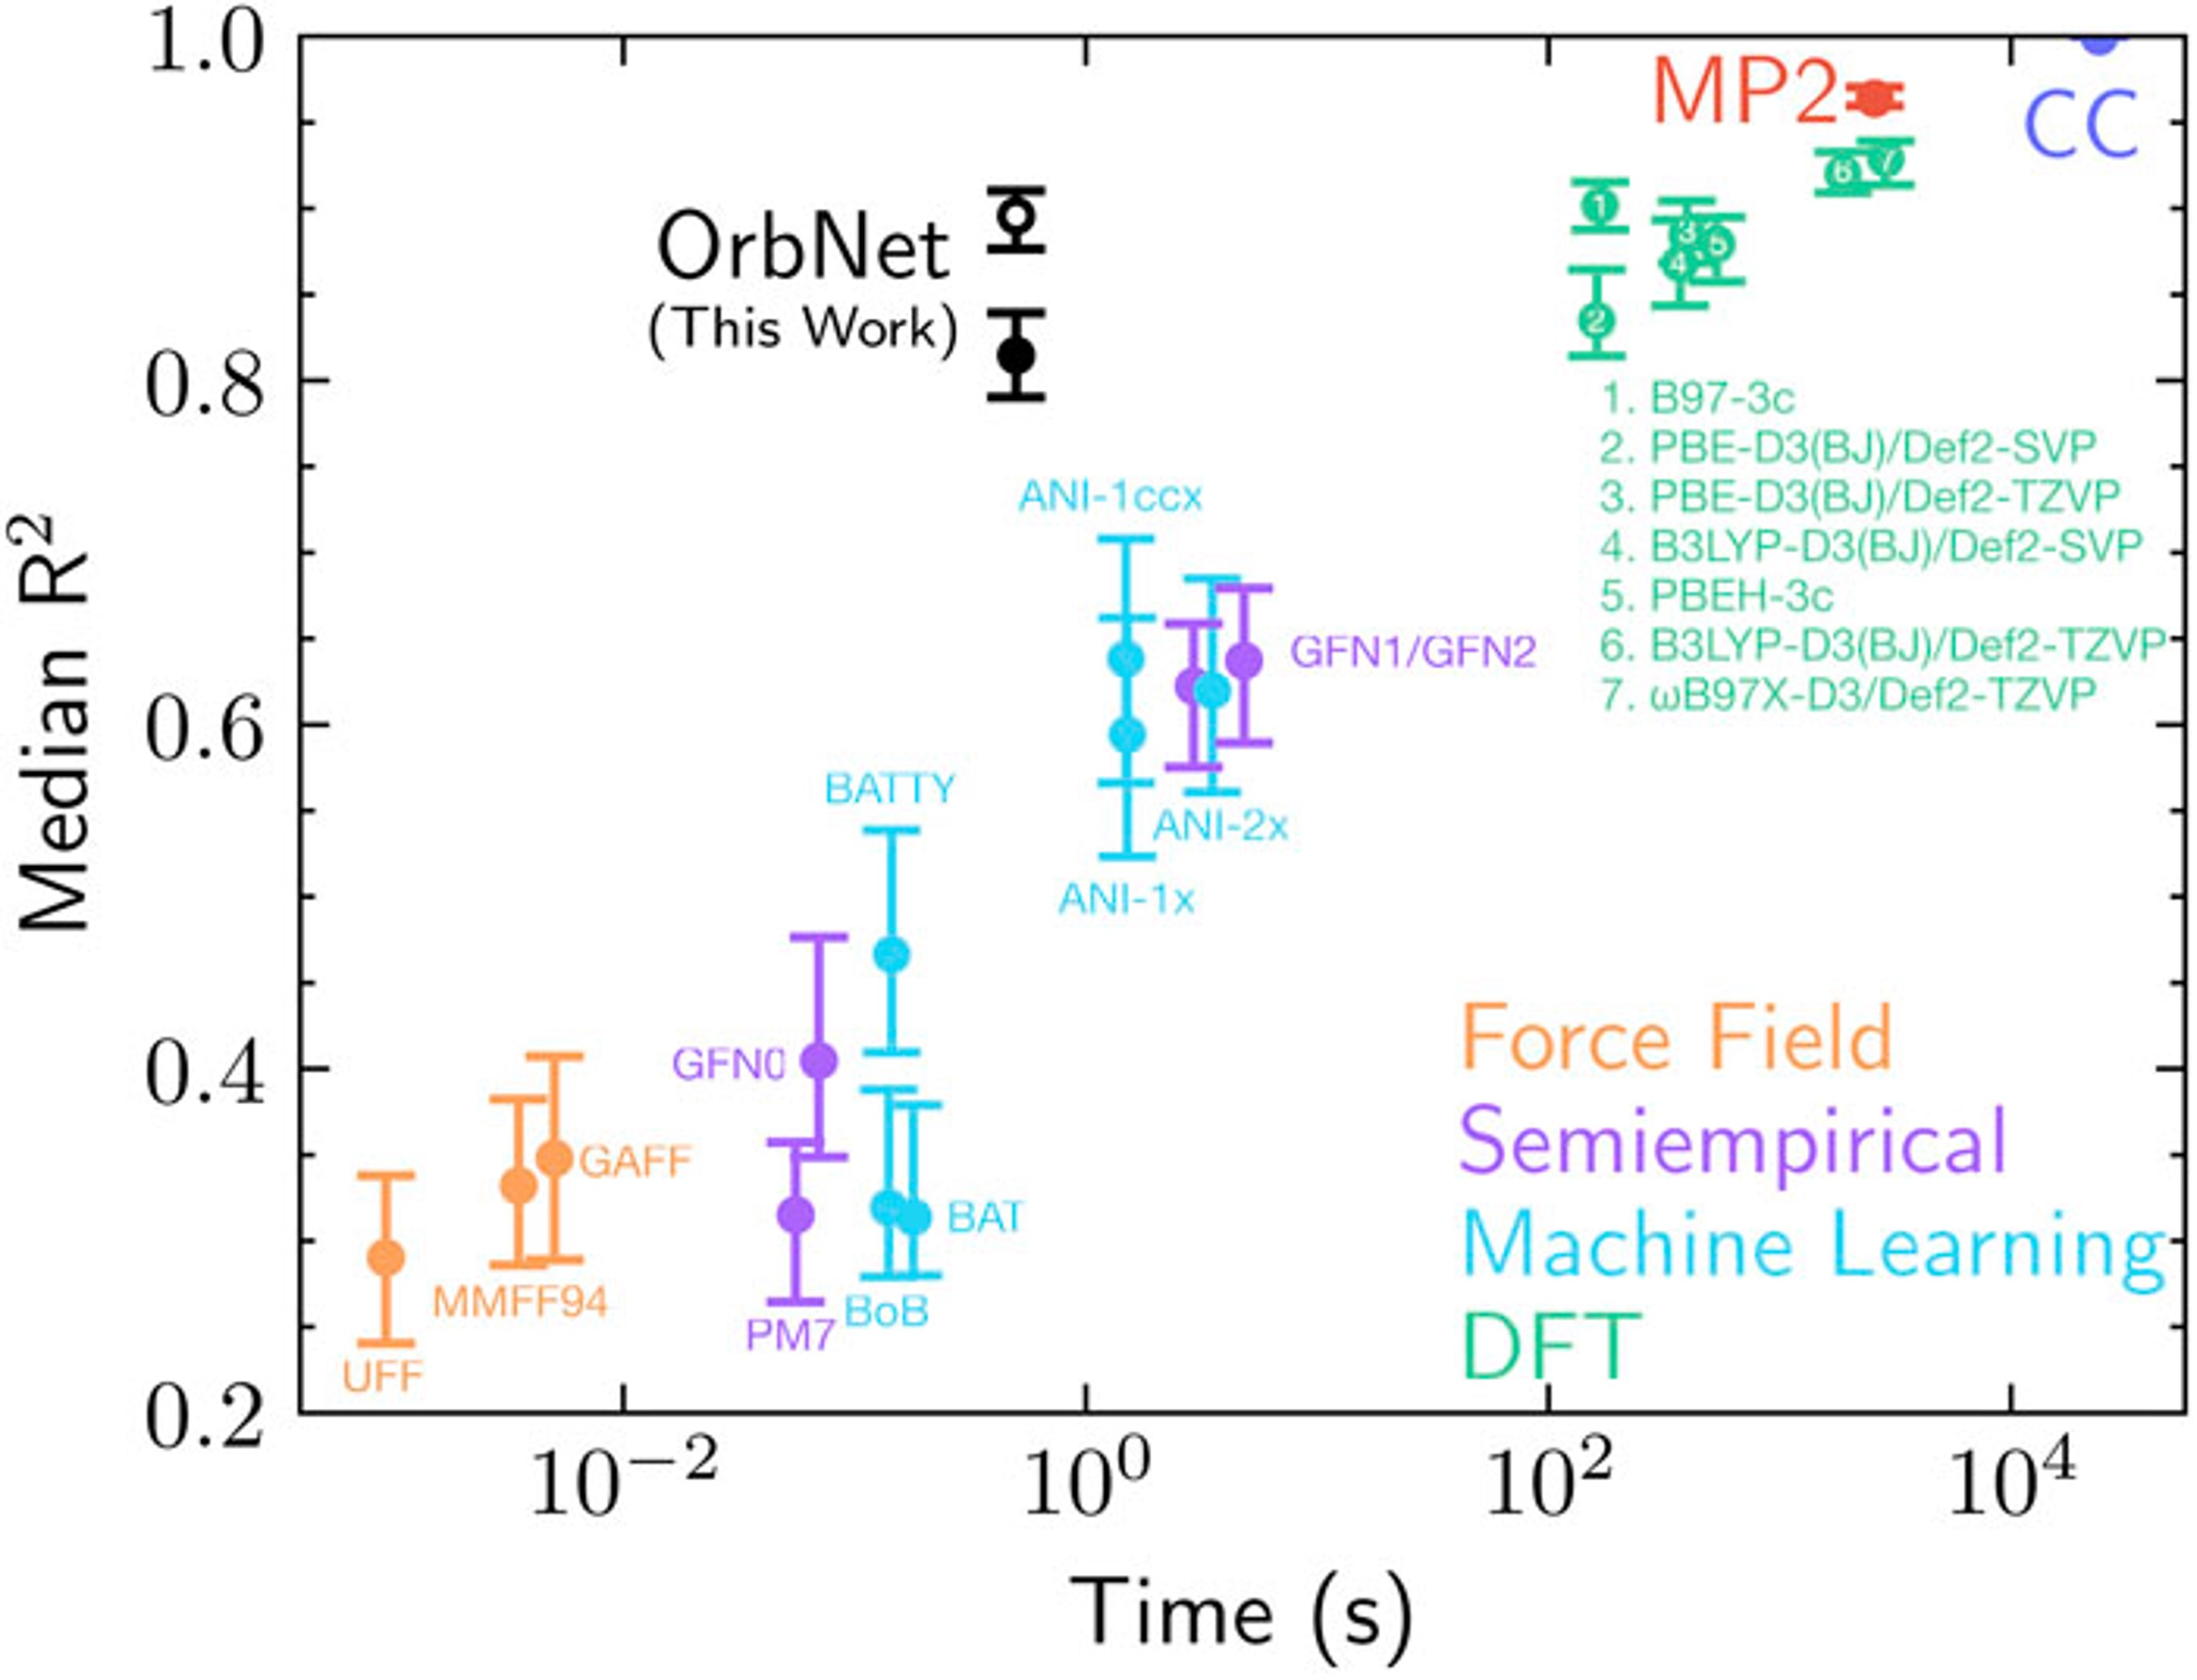

In [3]:
# Image from Qiao, Z., Welborn, M., Anandkumar, A., Manby, F. R., & Miller, T. F. (2020). OrbNet: Deep learning for quantum chemistry using symmetry-adapted atomic-orbital features. The Journal of chemical physics, 153(12).
Image(filename='./orbnet.jpg', width=750) 

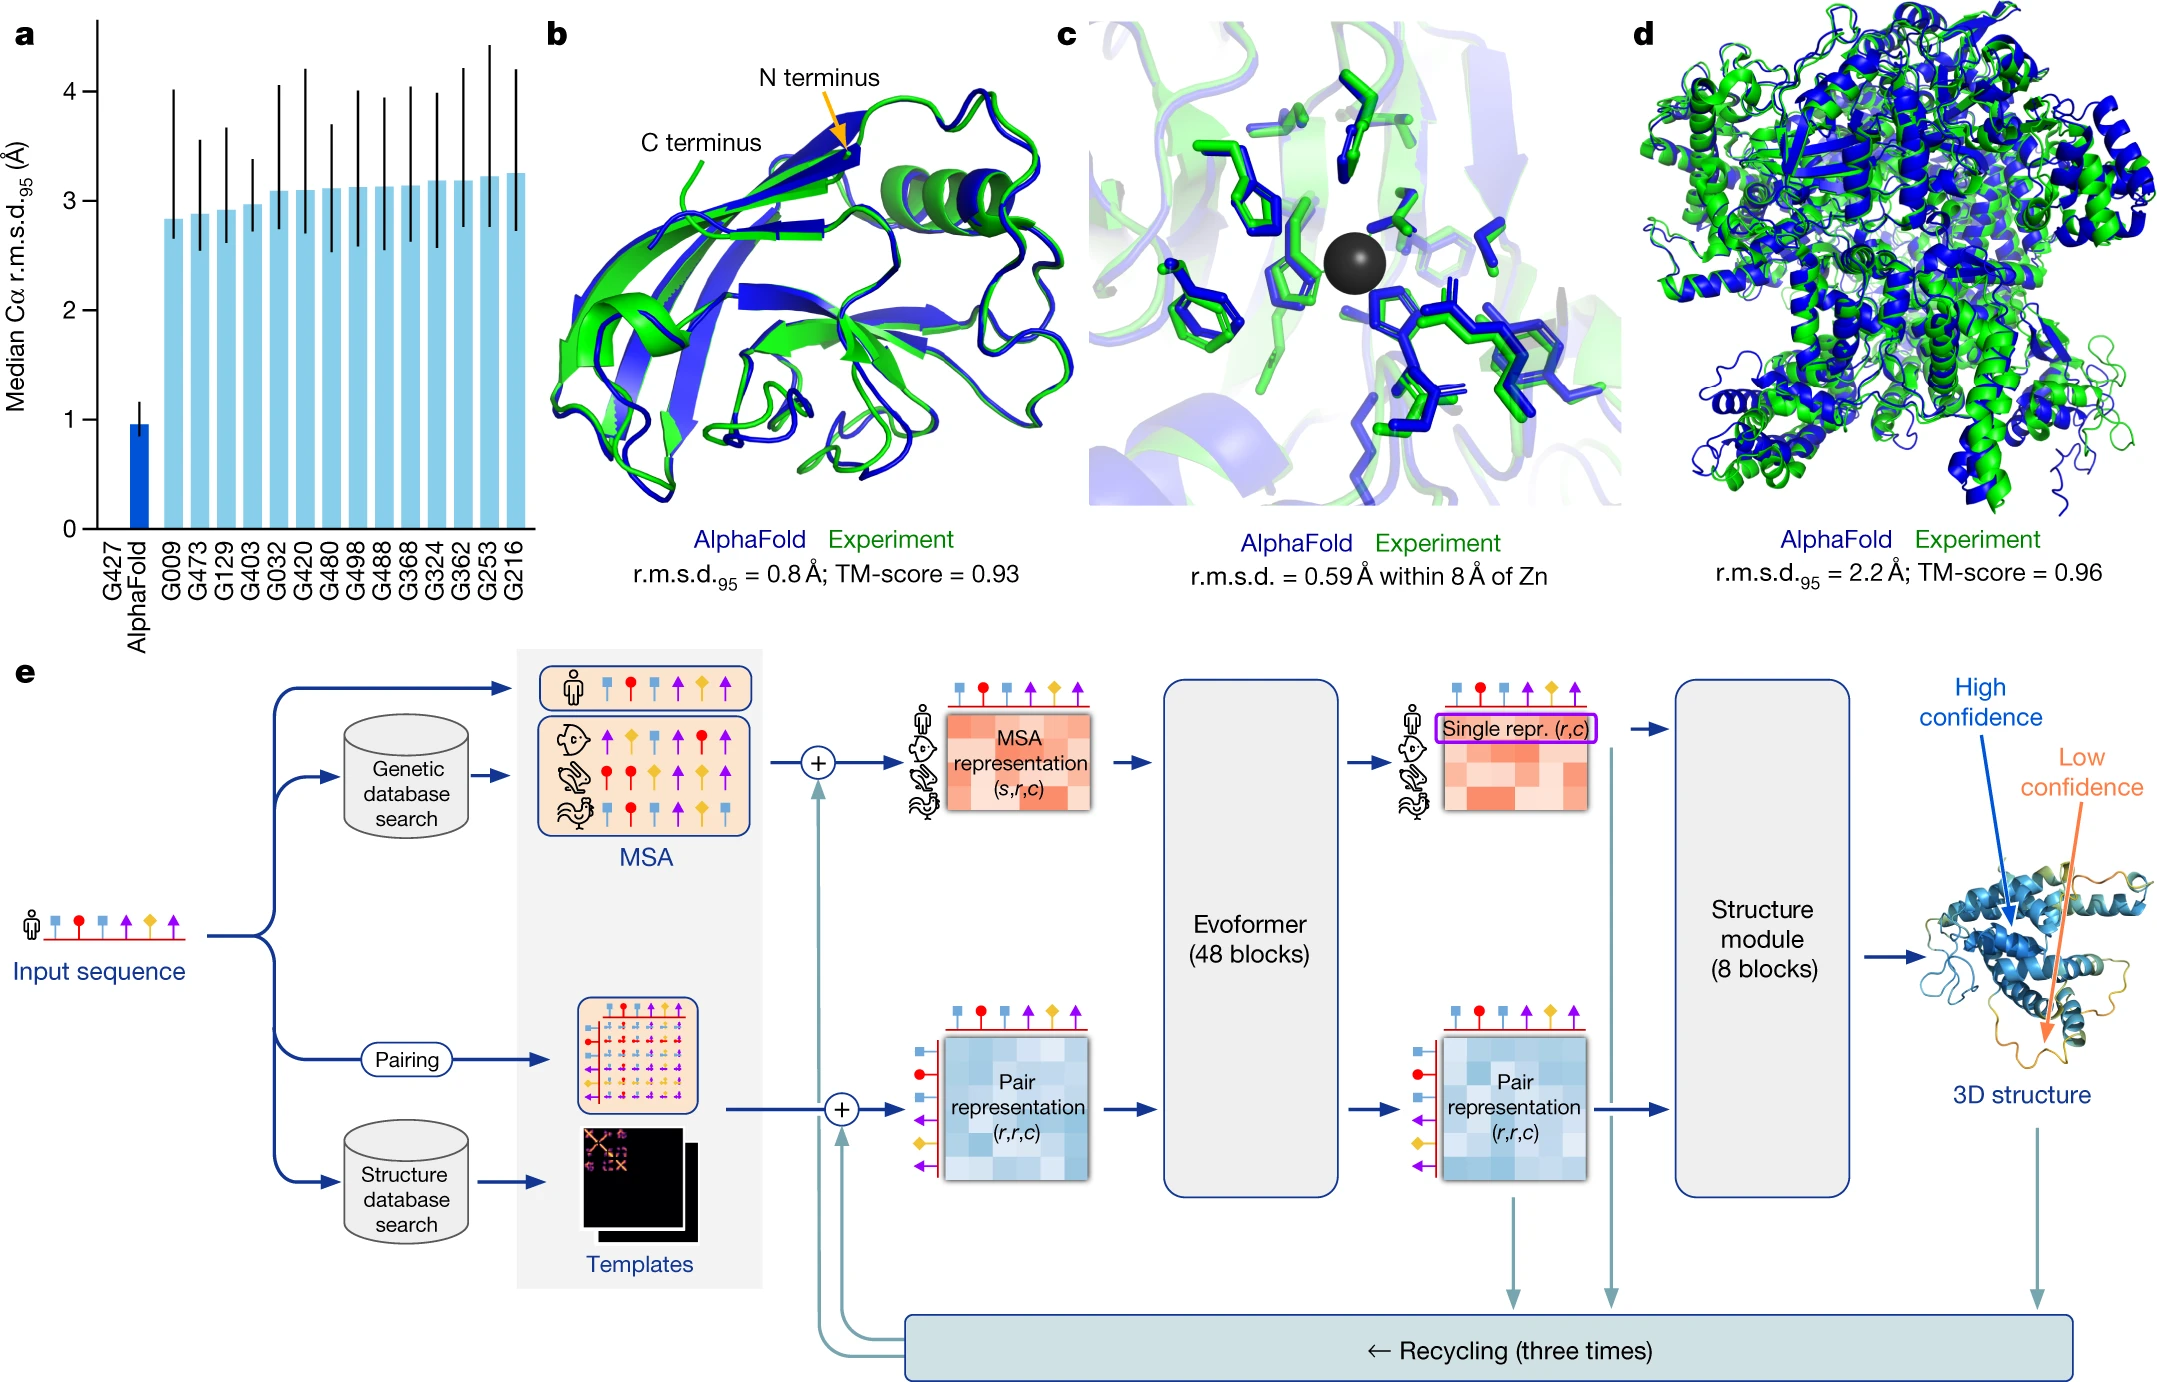

In [4]:
# Image from Jumper, J., Evans, R., Pritzel, A., Green, T., Figurnov, M., Ronneberger, O., ... & Hassabis, D. (2021). Highly accurate protein structure prediction with AlphaFold. Nature, 596(7873), 583-589.
Image(filename='./alphafold.png', width=750) 

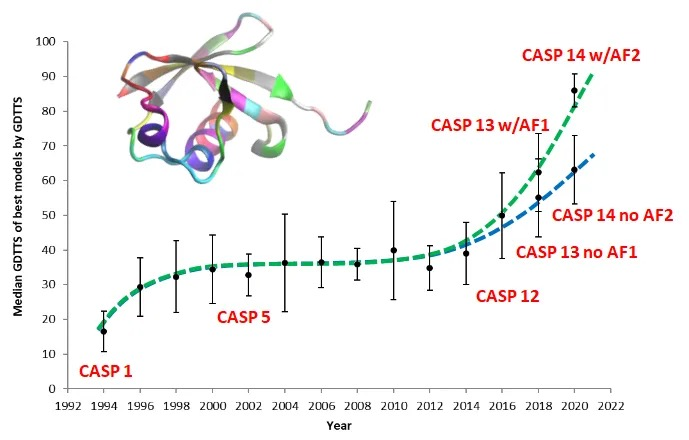

In [5]:
# https://towardsdatascience.com/google-colab-notebooks-are-already-running-deepminds-alphafold-v-2-92b4531ec127
Image(filename='./alphafold.jpg', width=750)

In today's lecture, you will learn:
- managing, studying, and manipulating tabular data with pandas
- concept and deployment of basic machine learning with scikit-learn

## **Pandas -- for managing, studying and manipulating tabular data**

Tabular data is a type of structured data organized in rows and columns, akin to a spreadsheet or a database table. And Pandas is a powerful open-source data analysis and manipulation library for Python.

### **Overview**

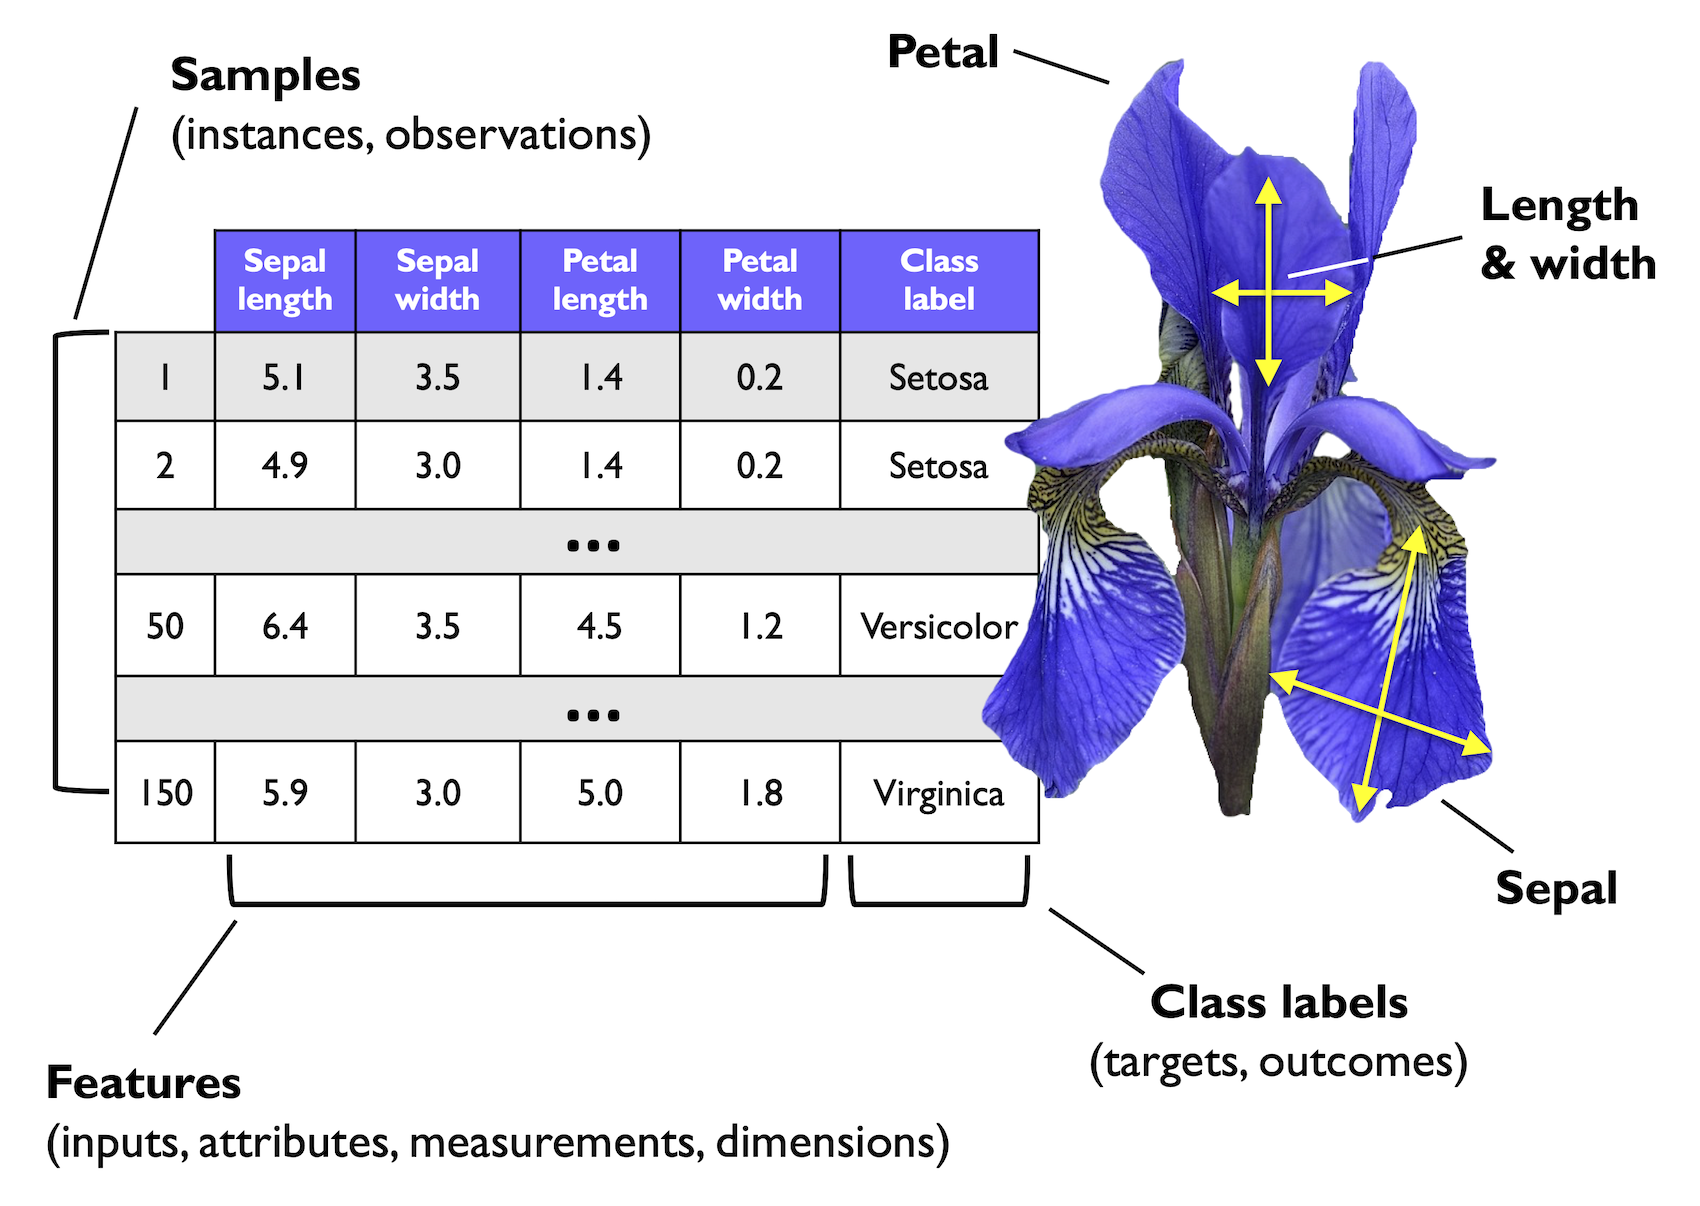

In [6]:
# Image from Machine Learning with PyTorch and Scikit-Learn, Sebastian Raschka, Yuxi Liu, Vahid Mirjalili
Image(filename='./01_08.png', width=750) 

In [7]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [8]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [9]:
iris.tail(3)

sepal_length  sepal_width  petal_length  petal_width    species
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [10]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
iris.to_numpy()[:3]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa']], dtype=object)

In [14]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [15]:
iris.loc[:3, "sepal_width"]

0    3.5
1    3.0
2    3.2
3    3.1
Name: sepal_width, dtype: float64

In [16]:
iris[(iris['sepal_length'] > 6.5) & (iris['petal_width'] < 1.5)]

sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
58           6.6          2.9           4.6          1.3  versicolor
65           6.7          3.1           4.4          1.4  versicolor
75           6.6          3.0           4.4          1.4  versicolor
76           6.8          2.8           4.8          1.4  versicolor

### **Data Structure**

Data alignment is intrinsic: the link between labels and data will not be broken unless done so.

In [17]:
# Series
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.347761
b    0.786153
c   -0.811218
d    1.564684
e   -1.322054
dtype: float64

Series is ndarray-like and dict-like

In [18]:
s[1]

0.7861532874533664

In [19]:
s[s > s.median()]

b    0.786153
d    1.564684
dtype: float64

In [20]:
np.exp(s)

a    1.415894
b    2.194937
c    0.444317
d    4.781162
e    0.266587
dtype: float64

In [21]:
s.to_numpy()

array([ 0.34776093,  0.78615329, -0.81121775,  1.56468352, -1.32205386])

In [22]:
s['a']

0.3477609270750428

In [23]:
'e' in s

True

In [24]:
# Dataframe
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [25]:
iris.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [26]:
df = pd.DataFrame({
     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
})
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

In [27]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [28]:
df.columns

Index(['one', 'two'], dtype='object')

### **Indexing and selection**

In [29]:
df = pd.DataFrame({
     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
})
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [30]:
# Select column
df[['one', 'two']]

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [31]:
# Select row by label
df.loc['a']

one    1.0
two    1.0
Name: a, dtype: float64

In [32]:
# Select row by integer location
df.iloc[1]

one    2.0
two    2.0
Name: b, dtype: float64

In [33]:
# Select rows by slicing
df.iloc[1:]

one  two
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [34]:
# Select rows by slicing
df[1:]

one  two
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [35]:
df[::2]

one  two
a  1.0  1.0
c  3.0  3.0

In [36]:
# Changing columns' order
new_columns = df.columns.to_list()[2:] + df.columns.to_list()[:2]
df[new_columns]

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [37]:
# Select values by label
df.loc['a', ['one', 'two']]

one    1.0
two    1.0
Name: a, dtype: float64

In [38]:
# Select values by position
df.iloc[0, :2]

one    1.0
two    1.0
Name: a, dtype: float64

In [39]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [40]:
# Quiz: what are the output of these two?
iris.loc[:3, 'sepal_length'], iris.iloc[:3, 0]

(0    5.1
 1    4.9
 2    4.7
 3    4.6
 Name: sepal_length, dtype: float64,
 0    5.1
 1    4.9
 2    4.7
 Name: sepal_length, dtype: float64)

### **Statistics**

Pandas provide methods to calculate descriptive statistics on Series and DataFrame

In [41]:
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [42]:
# Mean value over one axis
df.mean(axis=0)

one    2.0
two    2.5
dtype: float64

In [43]:
df.mean(axis=1)

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [44]:
# By default, it skip NaN values, but you can turn it off
df.mean(axis=1, skipna=False)

a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64

In [45]:
# Similarly, you can calculate summation, standard deviation
print(f"sum: \n{df.sum()} \n")
print(f"std: \n{df.std()} \n")
print(f"min: \n{df.min()} \n")
print(f"max: \n{df.max()} \n")
print(f"quantile (value at %): \n{df.quantile(q=0.9)} \n")
df

sum: 
one     6.0
two    10.0
dtype: float64 

std: 
one    1.000000
two    1.290994
dtype: float64 

min: 
one    1.0
two    1.0
dtype: float64 

max: 
one    3.0
two    4.0
dtype: float64 

quantile (value at %): 
one    2.8
two    3.7
Name: 0.9, dtype: float64 



one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [46]:
# Another class applies cumulative operation and returns a dataframe
df.cumsum()

one   two
a  1.0   1.0
b  3.0   3.0
c  6.0   6.0
d  NaN  10.0

In [47]:
df.cumprod()

one   two
a  1.0   1.0
b  2.0   2.0
c  6.0   6.0
d  NaN  24.0

In [48]:
# describe function
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [49]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [50]:
iris.describe(percentiles=[0.05, 0.5, 0.95])

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
5%         4.600000     2.345000      1.300000     0.200000
50%        5.800000     3.000000      4.350000     1.300000
95%        7.255000     3.800000      6.100000     2.300000
max        7.900000     4.400000      6.900000     2.500000

### **Plot**

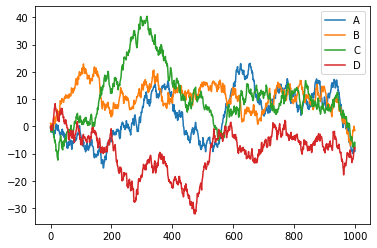

In [51]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list("ABCD"))
df = df.cumsum()
df.plot()
plt.show()

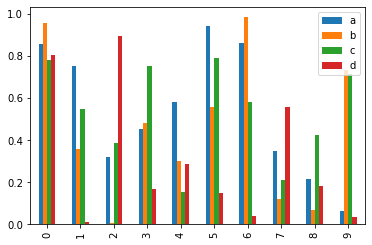

In [52]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()
plt.show()

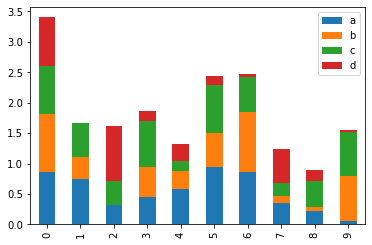

In [53]:
df2.plot.bar(stacked=True)
plt.show()

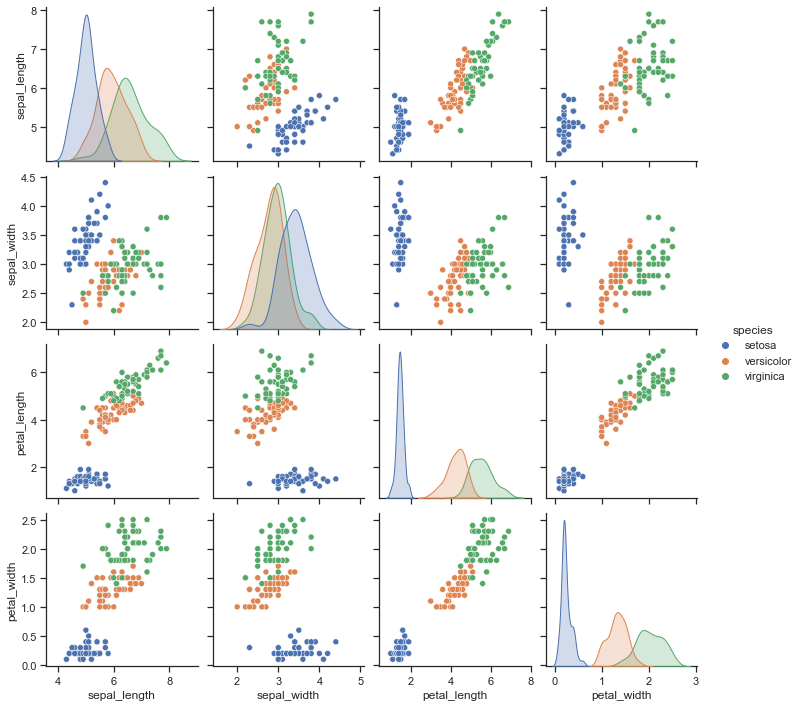

In [54]:
# Seaborn
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(iris, hue="species")
plt.show()

### **Manipulate**

In [55]:
df = pd.DataFrame({
     "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
     "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
})
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [56]:
# Adding columns
df["three"] = df["one"] * df["two"]
df["four"] = [2.0, 3.0, 4.0, 5.0]
df["flag"] = df["one"] > 2
df

one  two  three  four   flag
a  1.0  1.0    1.0   2.0  False
b  2.0  2.0    4.0   3.0  False
c  3.0  3.0    9.0   4.0   True
d  NaN  4.0    NaN   5.0  False

In [57]:
# Deleting columns
del df['flag']
df

one  two  three  four
a  1.0  1.0    1.0   2.0
b  2.0  2.0    4.0   3.0
c  3.0  3.0    9.0   4.0
d  NaN  4.0    NaN   5.0

In [58]:
# Adding rows -- Not convenient, but can be done by concatenation
new_row = pd.DataFrame({
    'e': [0.1, 0.2, 0.3, 0.4]
}, index=['one', 'two', 'three', 'four'])
new_row

e
one    0.1
two    0.2
three  0.3
four   0.4

In [59]:
pd.concat([df, new_row.T])

one  two  three  four
a  1.0  1.0    1.0   2.0
b  2.0  2.0    4.0   3.0
c  3.0  3.0    9.0   4.0
d  NaN  4.0    NaN   5.0
e  0.1  0.2    0.3   0.4

In [60]:
new_column = pd.DataFrame({
    'five': [0.1, 0.2, 0.3, 0.4],
    'six': [0.0, 0.1, 0.2, 0.3]
}, index=['a', 'b', 'c', 'd'])
pd.concat([df, new_column], axis=1)

one  two  three  four  five  six
a  1.0  1.0    1.0   2.0   0.1  0.0
b  2.0  2.0    4.0   3.0   0.2  0.1
c  3.0  3.0    9.0   4.0   0.3  0.2
d  NaN  4.0    NaN   5.0   0.4  0.3

In [61]:
# Join two dataset with merge
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

key  lval
0  foo     1
1  bar     2

In [62]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

key  rval
0  foo     4
1  bar     5

In [63]:
pd.merge(left, right, on="key")

key  lval  rval
0  foo     1     4
1  bar     2     5

In [64]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

key  lval
0  foo     1
1  foo     2

In [65]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

key  rval
0  foo     4
1  foo     5

In [66]:
pd.merge(left, right, on="key")

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

In [67]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

In [68]:
# Handle missing data
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

In [69]:
df.loc['b', ['two', 'four']] = np.nan
df.reset_index(drop=True, inplace=True)
df

id raw_grade  two  four
0  1.0         a  NaN   NaN
1  2.0         b  NaN   NaN
2  3.0         b  NaN   NaN
3  4.0         a  NaN   NaN
4  5.0         a  NaN   NaN
5  6.0         e  NaN   NaN
6  NaN       NaN  NaN   NaN

In [70]:
# detect NaN
df.notna()

id  raw_grade    two   four
0   True       True  False  False
1   True       True  False  False
2   True       True  False  False
3   True       True  False  False
4   True       True  False  False
5   True       True  False  False
6  False      False  False  False

In [71]:
# detect NaN
df.isna()

id  raw_grade   two  four
0  False      False  True  True
1  False      False  True  True
2  False      False  True  True
3  False      False  True  True
4  False      False  True  True
5  False      False  True  True
6   True       True  True  True

In [72]:
# delete rows/columns with nan
df.dropna(axis=0)

Empty DataFrame
Columns: [id, raw_grade, two, four]
Index: []

In [73]:
df.dropna(axis=1)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6]

In [74]:
# Insert scalar values to missing locations
df.fillna(0)

id raw_grade  two  four
0  1.0         a  0.0   0.0
1  2.0         b  0.0   0.0
2  3.0         b  0.0   0.0
3  4.0         a  0.0   0.0
4  5.0         a  0.0   0.0
5  6.0         e  0.0   0.0
6  0.0         0  0.0   0.0

In [75]:
# Filling missing locations with interpolation
df.interpolate()

id raw_grade  two  four
0  1.0         a  NaN   NaN
1  2.0         b  NaN   NaN
2  3.0         b  NaN   NaN
3  4.0         a  NaN   NaN
4  5.0         a  NaN   NaN
5  6.0         e  NaN   NaN
6  6.0       NaN  NaN   NaN

In [76]:
# Various interpolation method available in scipy: https://docs.scipy.org/doc/scipy/reference/interpolate.html#univariate-interpolation
df.interpolate(method='spline', order=1)

id raw_grade  two  four
0  1.0         a  NaN   NaN
1  2.0         b  NaN   NaN
2  3.0         b  NaN   NaN
3  4.0         a  NaN   NaN
4  5.0         a  NaN   NaN
5  6.0         e  NaN   NaN
6  7.0       NaN  NaN   NaN

In [77]:
# Multipe levels and reshaping by stack
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)


index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df

A         B
first second                    
bar   one     2.118721 -0.691971
      two    -0.644454  0.411386
baz   one     1.312357  0.276326
      two    -0.594716  0.465381
foo   one     0.420766 -0.649917
      two     0.462515 -2.583240
qux   one    -0.862236  0.384889
      two    -0.560566 -1.901573

In [78]:
df.stack()

first  second   
bar    one     A    2.118721
               B   -0.691971
       two     A   -0.644454
               B    0.411386
baz    one     A    1.312357
               B    0.276326
       two     A   -0.594716
               B    0.465381
foo    one     A    0.420766
               B   -0.649917
       two     A    0.462515
               B   -2.583240
qux    one     A   -0.862236
               B    0.384889
       two     A   -0.560566
               B   -1.901573
dtype: float64

In [79]:
df.stack().unstack()

A         B
first second                    
bar   one     2.118721 -0.691971
      two    -0.644454  0.411386
baz   one     1.312357  0.276326
      two    -0.594716  0.465381
foo   one     0.420766 -0.649917
      two     0.462515 -2.583240
qux   one    -0.862236  0.384889
      two    -0.560566 -1.901573

### **Work with your own dataset**

In [80]:
# create dataframe, from dict of series
pd.DataFrame({
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
})

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [81]:
# create dataframe, from dict of list
pd.DataFrame({
    "one": [1.0, 2.0, 4.0, 8.0],
    "two": [1.0, 2.0, 3.0, 4.0],
}, index=["a", "b", "c", "d"])

one  two
a  1.0  1.0
b  2.0  2.0
c  4.0  3.0
d  8.0  4.0

In [82]:
# Save to csv, excel
# iris.to_excel('./iris.xls', index=False)
iris.to_csv('./iris.csv', index=False)

In [83]:
# Read from csv, excel
# iris.read_excel('./iris.xls', index=False)
%timeit pd.read_csv('./iris.csv')

386 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


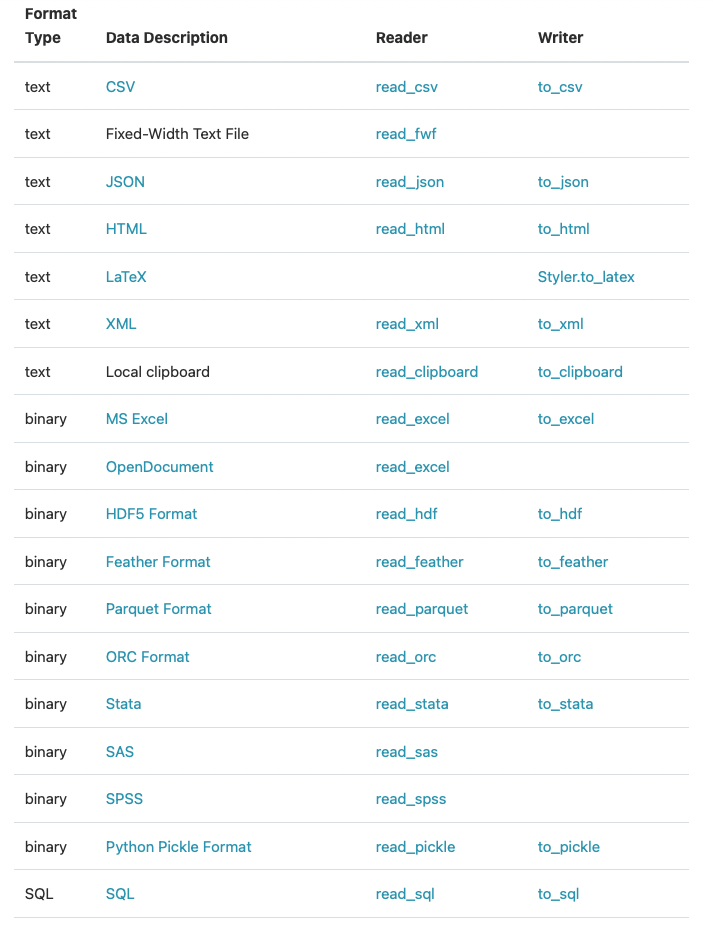

In [84]:
# Screenshot from https://pandas.pydata.org/docs/user_guide/index.html
Image(filename='./pandas_io.jpg', width=600) 

### **High performance computing**

In [85]:
nrows, ncols = 20000, 200
df1, df2, df3, df4 = [pd.DataFrame(np.random.randn(nrows, ncols)) for _ in range(4)]

In [86]:
df1

0         1         2         3         4         5         6    \
0      0.214861  1.196620 -1.017821  0.225195 -0.058127  0.290198 -0.029420   
1     -0.769998  0.879832 -0.253613  0.733216 -0.324565 -0.033981  3.359717   
2     -1.021067  0.360940  0.115391  0.343954  0.151245 -0.038621 -1.146987   
3      0.277907 -1.008849 -0.081895 -1.851329 -1.576926  1.137144 -0.610441   
4      2.647472 -1.461944 -2.328282 -1.119760  1.911166 -2.536568  0.716556   
...         ...       ...       ...       ...       ...       ...       ...   
19995  2.224341  0.710871 -0.595792  1.296749  0.029095  1.438815 -2.699400   
19996 -0.304513  0.519393 -0.851741 -0.506869 -0.001683 -1.869821 -1.231887   
19997 -0.811436 -2.066677 -2.147276  0.686597  1.022408 -0.634224 -1.612528   
19998 -1.322136  0.060031  0.862726 -0.831066 -0.072171 -1.017985 -0.685169   
19999 -0.279659 -0.984064 -0.244996  1.504630 -1.006534 -0.773200  0.145057   

            7         8         9    ...       190       191       192  \
0     -1.666686  1.053625  1.342740  ...  1.167595  0.115066 -2.222233   
1     -2.290923  0.675787 -0.431718  ...  1.507077  1.036403  0.526121   
2     -0.710966  0.618549 -1.807216  ... -0.557168  0.529720 -2.481722   
3     -0.737141 -0.613872 -1.783188  ... -0.159632  0.585451  1.378662   
4      0.971526 -0.018783  0.435169  ...  0.466010  0.792242  0.047541   
...         ...       ...       ...  ...       ...       ...       ...   
19995  0.203372 -1.410366  0.054297  ...  0.055178  1.040801 -2.525852   
19996 -0.004978  0.722902 -0.900716  ...  0.463801  1.619909 -0.661853   
19997 -0.547175 -0.043738  0.287736  ...  1.337468 -1.337390  0.667967   
19998  1.170648 -0.293583  0.251643  ... -0.467169 -1.441134 -0.556892   
19999 -0.134944 -0.513001  2.941718  ...  0.740063  2.256371  0.809437   

            193       194       195       196       197       198       199  
0     -1.095306 -1.355584 -0.822645 -0.173294 -0.240097 -0.056306 -0.413529  
1      1.405576  1.258394 -1.047030  0.602253 -1.176236  0.393916  0.182674  
2      0.719476  0.134618 -0.847891  1.193835  1.539293  1.521320 -0.445065  
3      0.888129  0.229301  0.963275  1.428702  0.477851 -0.380235 -0.257185  
4      0.867086 -1.084580 -0.081014 -1.004815  1.440973  1.502463 -1.856842  
...         ...       ...       ...       ...       ...       ...       ...  
19995  0.445370 -0.383411  0.687841  0.273355  1.612572  0.224999  0.172620  
19996  0.500526  1.145443  0.212258  0.299458 -1.234420  0.390067  1.447198  
19997  1.517801  2.216908 -1.649920 -1.169128  1.185656 -0.906920  0.431623  
19998 -2.097334  1.011225 -0.387570 -1.630819 -0.809793  0.416974 -0.495660  
19999 -0.456617 -0.014514  1.122690 -0.075154 -0.465139 -0.232931 -1.129639  

[20000 rows x 200 columns]

In [87]:
# eval() -- calculation accelerated by the low-level pandas engine
# on DataFrame or Series level
%timeit df1 + df2 + df3 + df4

3.56 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
%timeit pd.eval("df1 + df2 + df3 + df4")

2.93 ms ± 7.14 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [89]:
pd.eval("df1 + df2 + df3 + df4") == (df1 + df2 + df3 + df4)

0     1     2     3     4     5     6     7     8     9    ...   190  \
0      True  True  True  True  True  True  True  True  True  True  ...  True   
1      True  True  True  True  True  True  True  True  True  True  ...  True   
2      True  True  True  True  True  True  True  True  True  True  ...  True   
3      True  True  True  True  True  True  True  True  True  True  ...  True   
4      True  True  True  True  True  True  True  True  True  True  ...  True   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
19995  True  True  True  True  True  True  True  True  True  True  ...  True   
19996  True  True  True  True  True  True  True  True  True  True  ...  True   
19997  True  True  True  True  True  True  True  True  True  True  ...  True   
19998  True  True  True  True  True  True  True  True  True  True  ...  True   
19999  True  True  True  True  True  True  True  True  True  True  ...  True   

        191   192   193   194   195   196   197   198   199  
0      True  True  True  True  True  True  True  True  True  
1      True  True  True  True  True  True  True  True  True  
2      True  True  True  True  True  True  True  True  True  
3      True  True  True  True  True  True  True  True  True  
4      True  True  True  True  True  True  True  True  True  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
19995  True  True  True  True  True  True  True  True  True  
19996  True  True  True  True  True  True  True  True  True  
19997  True  True  True  True  True  True  True  True  True  
19998  True  True  True  True  True  True  True  True  True  
19999  True  True  True  True  True  True  True  True  True  

[20000 rows x 200 columns]

In [90]:
pd.eval("df1[0] + df1[1]") == (df1[0] + df1[1])

0        True
1        True
2        True
3        True
4        True
         ... 
19995    True
19996    True
19997    True
19998    True
19999    True
Length: 20000, dtype: bool

In [91]:
# Sparse data
df = pd.DataFrame(np.random.randn(10000, 4))
df.iloc[:9998] = np.nan
sdf = df.astype(pd.SparseDtype("float", np.nan))
sdf.head()

0   1   2   3
0 NaN NaN NaN NaN
1 NaN NaN NaN NaN
2 NaN NaN NaN NaN
3 NaN NaN NaN NaN
4 NaN NaN NaN NaN

In [92]:
sdf.tail()

0         1         2         3
9995       NaN       NaN       NaN       NaN
9996       NaN       NaN       NaN       NaN
9997       NaN       NaN       NaN       NaN
9998 -1.276289 -1.101442 -2.594534 -0.224274
9999  0.461784  0.348781  1.038611 -1.698156

In [93]:
sdf.sparse.density

0.0002

In [94]:
print('dense : {:0.2f} bytes'.format(df.memory_usage().sum() / 1e3))
print('sparse : {:0.2f} bytes'.format(sdf.memory_usage().sum() / 1e3))

dense : 320.13 bytes
sparse : 0.22 bytes


In [95]:
# Large dataset
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
nrows, ncols = 20000, 7
df = pd.DataFrame(np.random.randn(nrows, ncols), columns=columns)
df

a         b         c         d         e         f         g
0      2.152335 -1.609168 -1.974200  0.079463 -0.081217  1.227970 -0.354391
1      0.692433 -1.665001 -0.216894 -0.222194 -2.072589 -0.491496 -1.738624
2      1.033487 -0.470849  1.240439  0.408570  1.345928  0.034583  1.337965
3     -0.517854  2.565586  0.351630 -0.003534 -1.368823 -1.092204  0.407466
4      0.275983  0.953495  0.748798 -2.202373  1.751211 -1.034801  0.020664
...         ...       ...       ...       ...       ...       ...       ...
19995  1.118804 -1.155424  0.084309  0.443845 -0.279123  0.280755 -0.901340
19996  0.346243  0.498877  1.860028  0.626558  1.973100 -0.245191  0.679321
19997 -0.001013  1.551044 -1.120453 -0.793304 -2.037424  0.337971 -0.237869
19998  0.642549 -0.538789 -2.719451 -0.708383 -0.306475 -1.396356  0.395526
19999 -0.066930 -0.628467  0.332303 -0.306556 -0.670392  0.818155  1.029932

[20000 rows x 7 columns]

In [96]:
%timeit df.to_csv('./temp.csv', index=False)

97 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
%timeit pd.read_csv('./temp.csv')

11.6 ms ± 83.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [98]:
%timeit df.to_parquet("./data.parquet")

6.29 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [99]:
%timeit pd.read_parquet("./data.parquet", columns=['a', 'b'])

782 µs ± 59.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [100]:
pd.read_parquet("./data.parquet", columns=['a', 'b'])

a         b
0      2.152335 -1.609168
1      0.692433 -1.665001
2      1.033487 -0.470849
3     -0.517854  2.565586
4      0.275983  0.953495
...         ...       ...
19995  1.118804 -1.155424
19996  0.346243  0.498877
19997 -0.001013  1.551044
19998  0.642549 -0.538789
19999 -0.066930 -0.628467

[20000 rows x 2 columns]

## **Scikit-Learn -- machine learning starts**

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

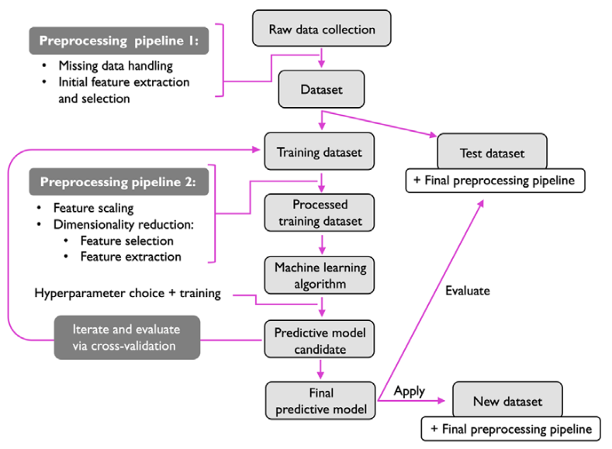

In [101]:
# Image from Machine Learning with PyTorch and Scikit-Learn, Sebastian Raschka, Yuxi Liu, Vahid Mirjalili
Image(filename='./ml.png', width=750) 

Start with the Iris dataset, how to obtain a classifier to predict the class label of iris?

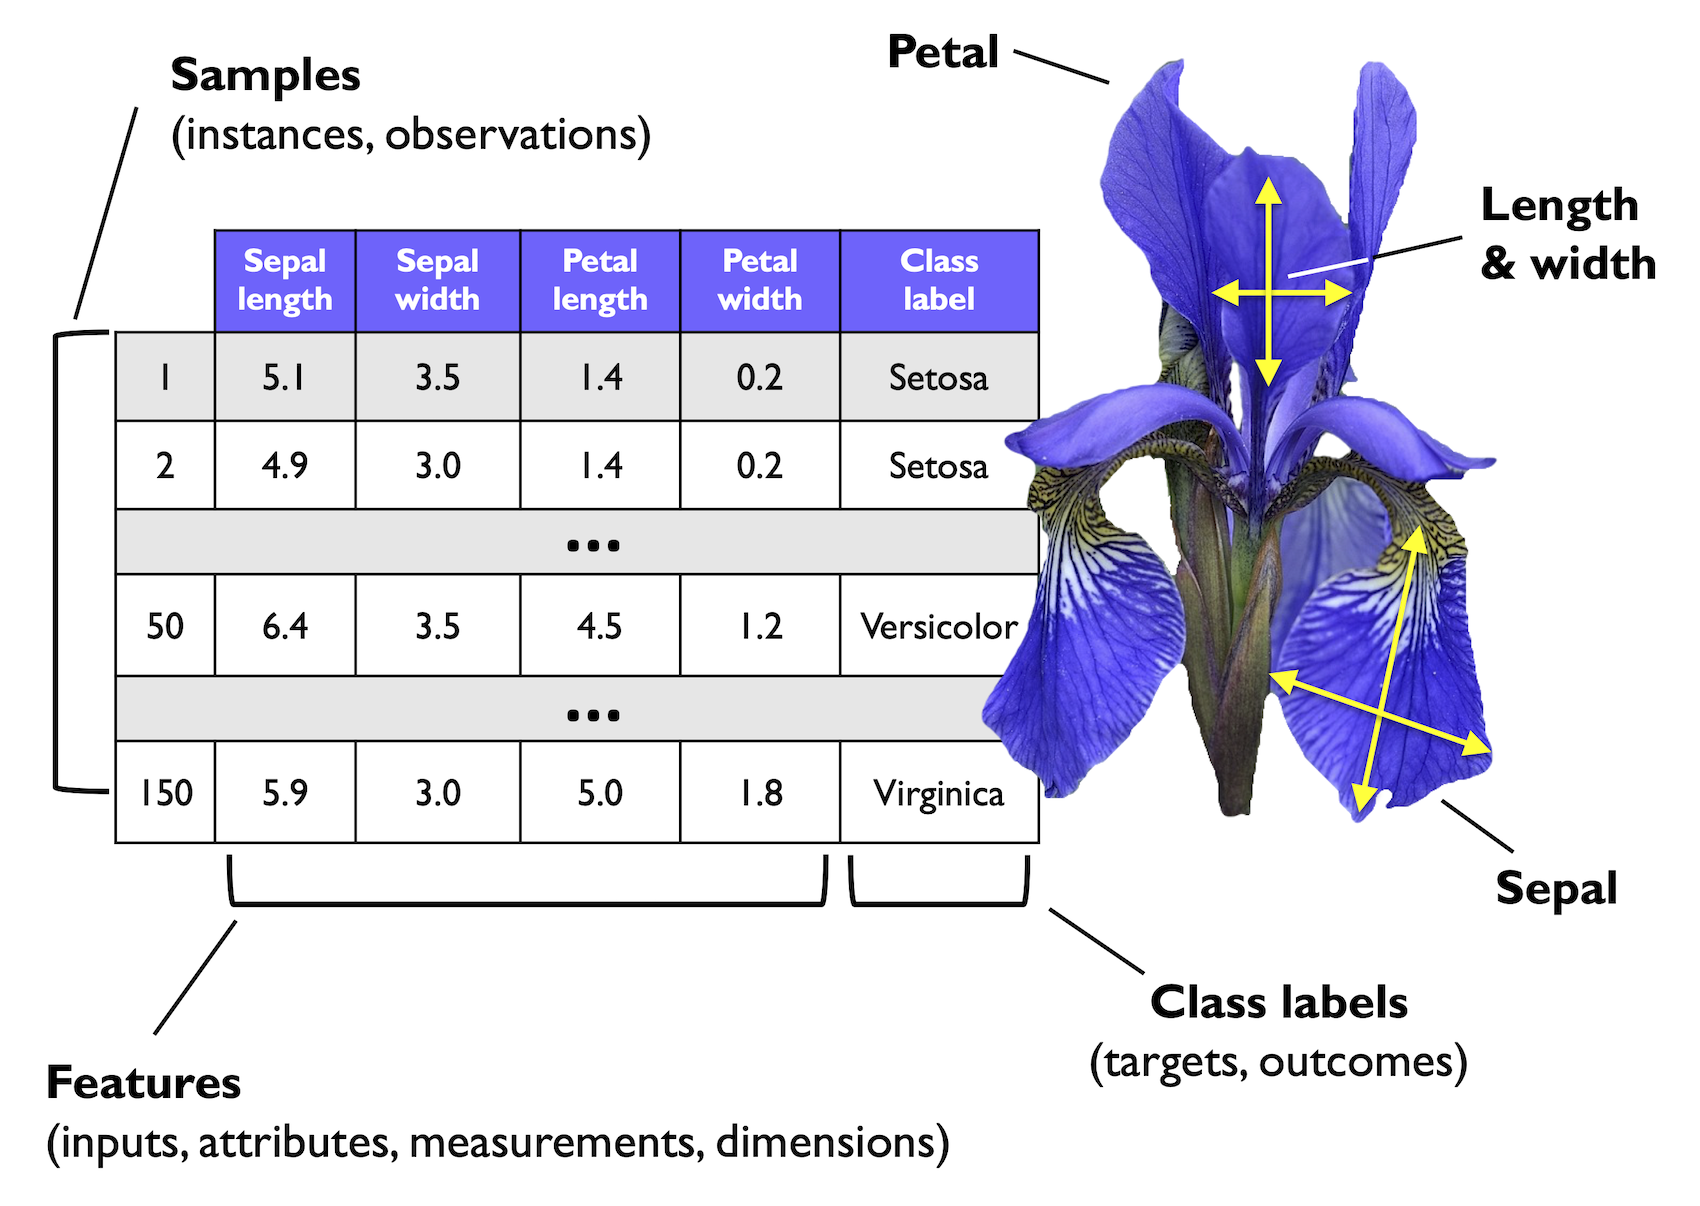

In [102]:
Image(filename='./01_08.png', width=750) 

In [103]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

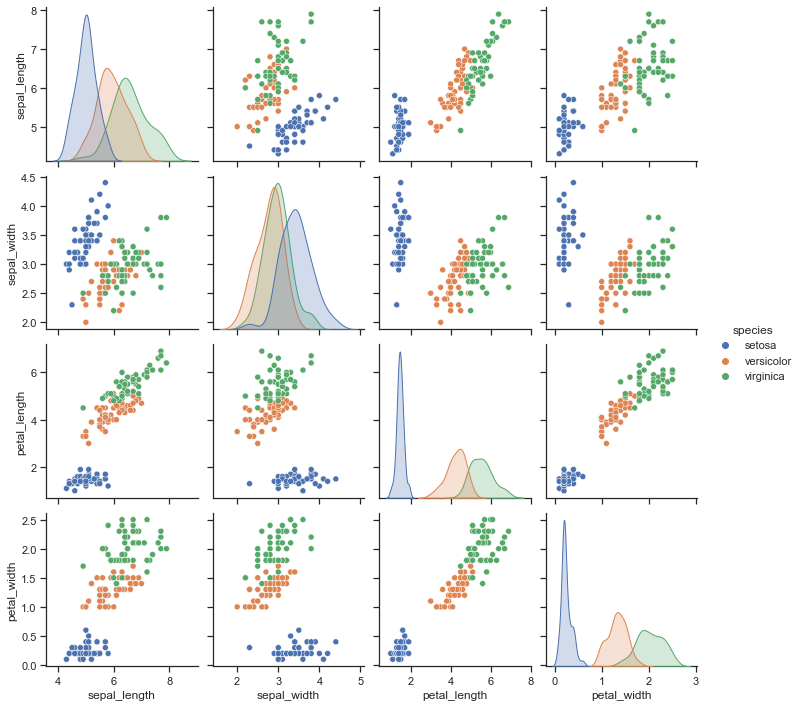

In [104]:
# First have a look at the data
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(iris, hue="species")
plt.show()

In [105]:
X = iris.iloc[:, 2:4].to_numpy()
y = iris.species.to_numpy()
X[:5], y[:5]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]),
 array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object))

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [107]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

In [108]:
y_train.shape, y_test.shape

((105,), (45,))

In [109]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

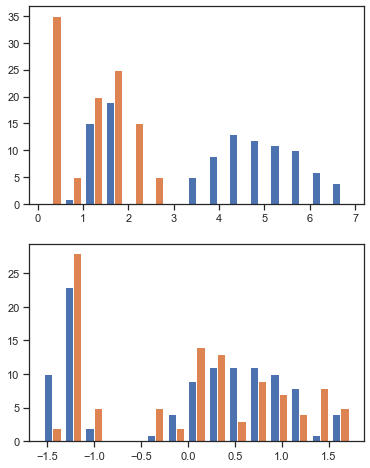

In [110]:
f, ax = plt.subplots(2, 1, figsize=(6, 8))
ax[0].hist(X_train, bins=15)
ax[1].hist(X_train_std, bins=15)
plt.show()

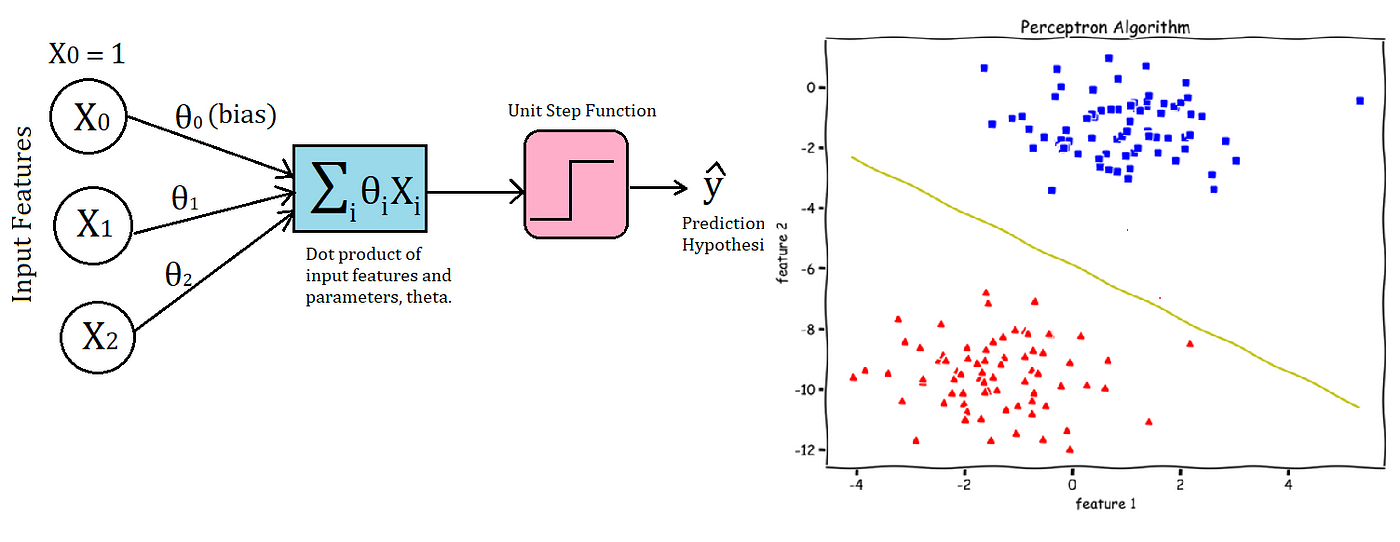

In [111]:
# Image from https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537
Image(filename='./perpectron.png', width=1000) 

In [112]:
# Deine a model class
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
# Equivalance to SGDClassifier(loss="perceptron", eta0=0.1, learning_rate="constant", penalty=None)

A model class defines a functional space

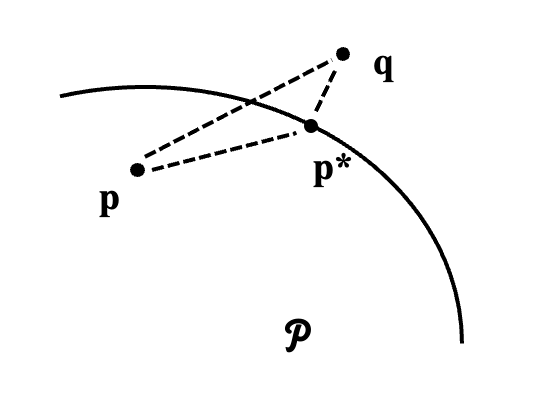

In [113]:
Image(filename='./space.jpg', width=500) 

Loss function: "distance" between functions

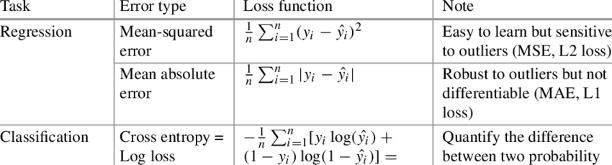

In [114]:
Image(filename='./loss.png', width=800) 

"Learning" -- optimizing loss function

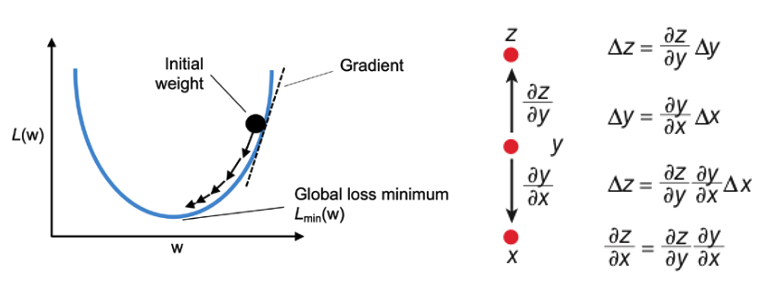

In [115]:
# Image from LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. nature, 521(7553), 436-444.
Image(filename='./learning.jpg', width=800) 

In [116]:
# Train the model
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

In [117]:
# Evaluation
from sklearn.metrics import accuracy_score

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 1
Accuracy: 0.978


In [118]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import preprocessing
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    le = preprocessing.LabelEncoder()
    lab = le.fit_transform(lab)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

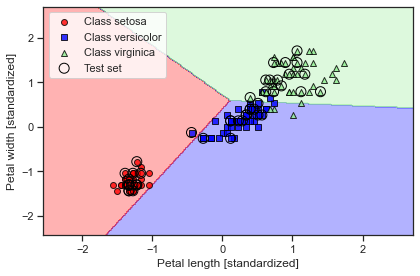

In [119]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

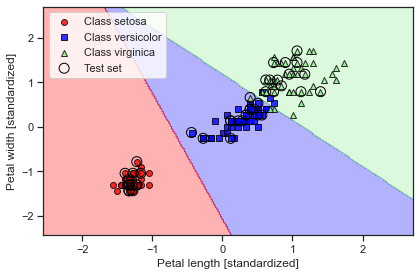

In [120]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

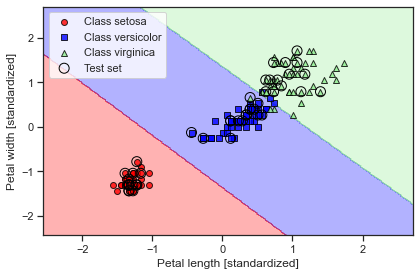

In [121]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

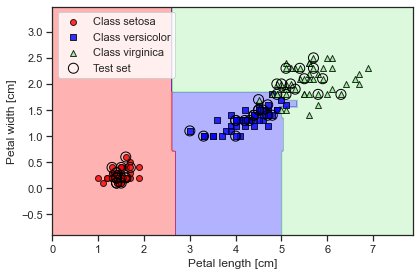

In [122]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

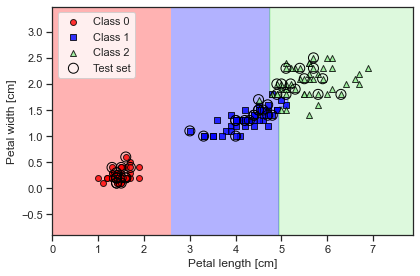

In [123]:
from xgboost import XGBClassifier
le = preprocessing.LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

classifier = XGBClassifier(n_estimators=25, 
                           random_state=1,
                           n_jobs=2)
classifier.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=classifier, test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

What's more?

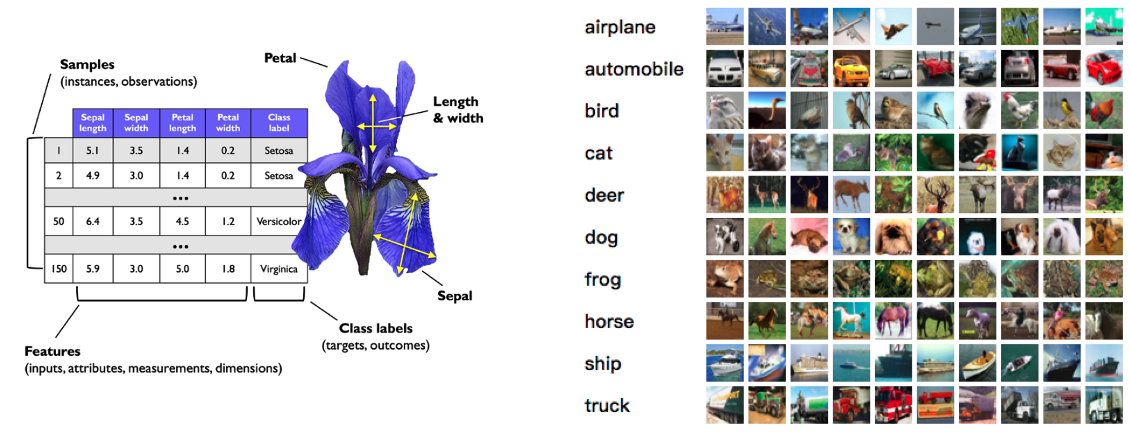

In [124]:
# Image from CIFAR-10
Image(filename='./cifar.jpg', width=1000) 

Hinton (2006) proposed to use neural networks (NN) to extract feature, which os called "end-to-end" learning manner now

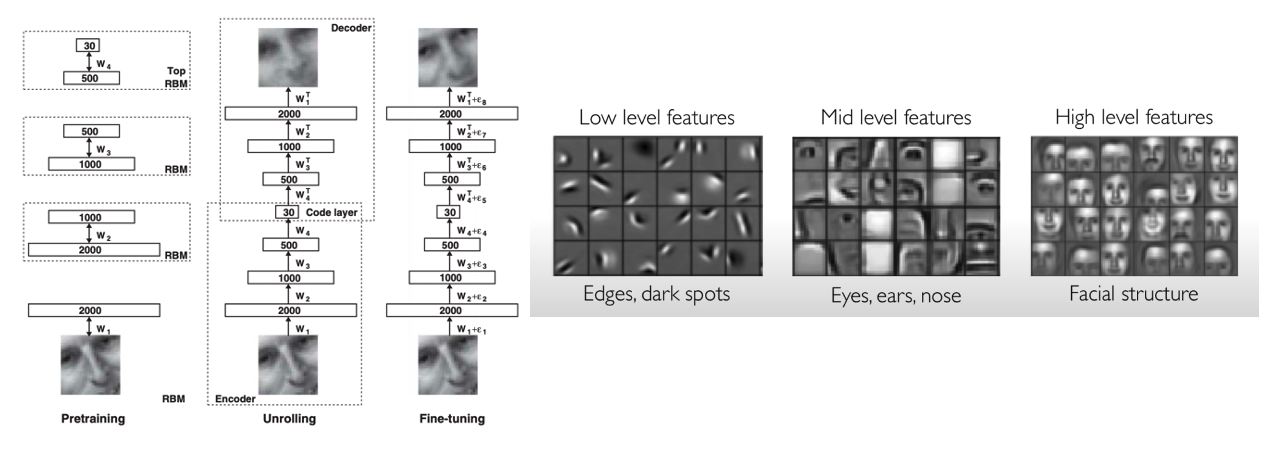

In [125]:
# Image from Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. science, 313(5786), 504-507.
Image(filename='./features.jpg', width=1200) 

Another reason to use NN: flexible with geometric prior

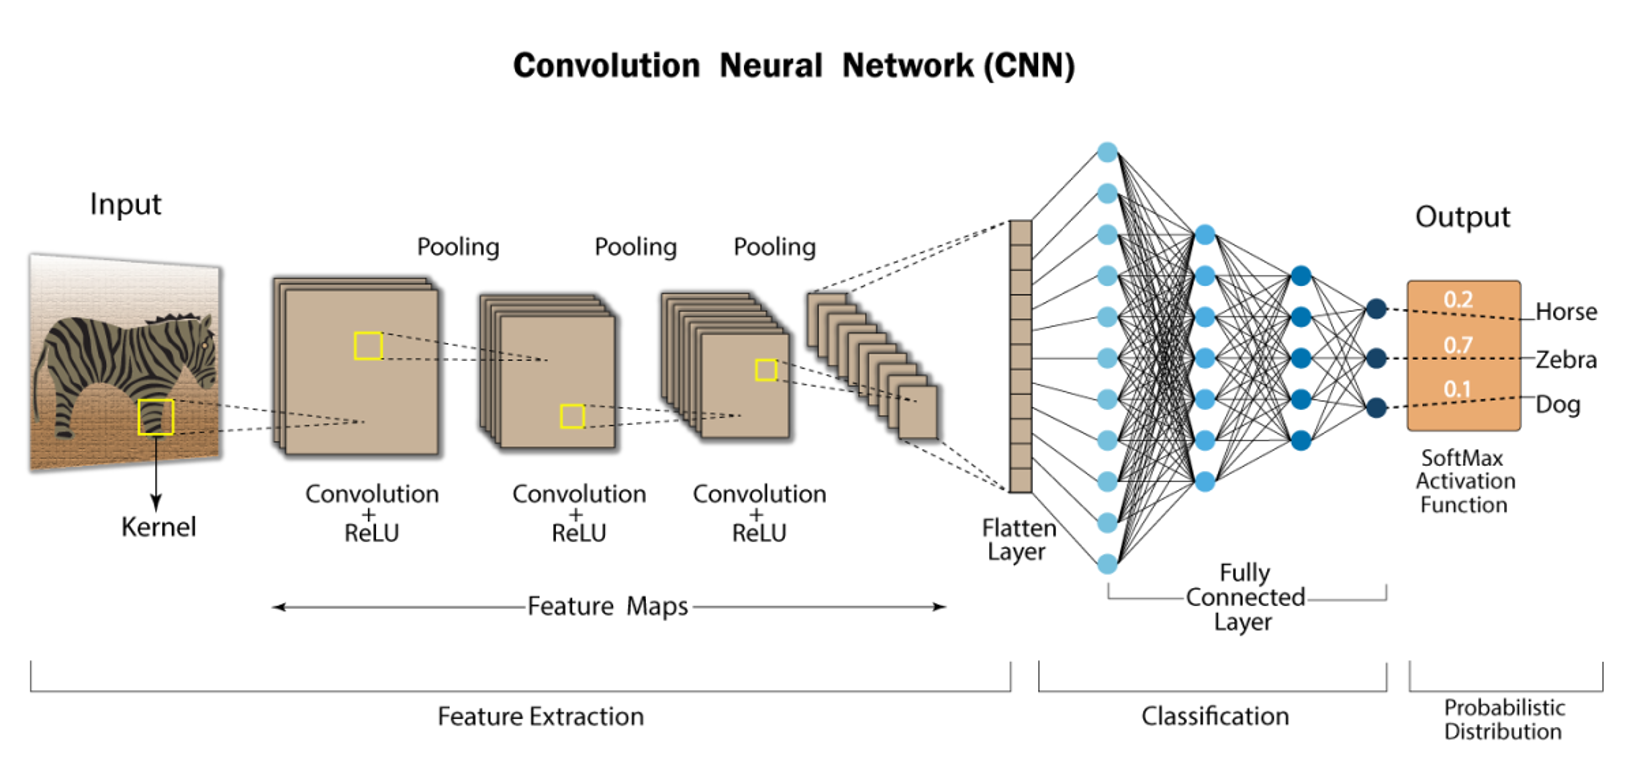

In [126]:
# https://developersbreach.com/convolution-neural-network-deep-learning/
Image(filename='./cnn.png', width=1000) 

These more complicated models require **something** supports numerical operations with 
- **automatic differentiation** (required for learning)
- high-performing computong (GPU acceleration in this case)

**That's PyTorch!**

## **Python Quirks Continued...**

In [127]:
# default argument

def foo(a=2):
  a = a + 1
  return a

In [128]:
foo()

3

In [129]:
foo(5)

6

In [130]:
# list as a default arguement

def foo_list(a=[]):
  a.append(5)
  return a

In [131]:
foo_list()

[5]

In [132]:
foo_list()

[5, 5]

In [133]:
# Functions in python are callable objects
# Here is an intuitive definition

class Foo_List:

  def __init__(self, a=[]):
    self.a = a

  def __call__(self):
    self.a.append(5)
    return self.a

In [134]:
f = Foo_List()

In [135]:
f()

[5]

In [136]:
f()

[5, 5]

Avoid using mutable variables as default arguements, as they give your function state, which can vary behavior of the function from call to call.